# Gender Classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
df = pd.read_csv('gender_classification_v7.csv')
df.sample(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
700,1,12.3,6.3,1,1,1,1,Male
490,1,12.4,6.8,1,0,0,1,Male
1993,1,11.9,7.1,0,1,0,1,Male
1286,1,15.5,5.8,1,1,1,1,Male
1005,1,12.5,5.2,0,0,0,0,Female
3059,1,15.1,6.1,1,1,1,1,Male
3431,1,12.0,5.8,1,1,0,1,Male
3208,1,11.5,6.4,0,0,1,0,Female
617,1,12.2,5.9,1,1,1,1,Male
1537,1,14.3,6.4,0,0,0,0,Female


In [3]:
df.shape

(5001, 8)

In [4]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [5]:
df.drop_duplicates()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,Male
4990,1,12.6,5.7,0,0,1,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female


In [6]:
df.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [7]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

No null values present

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [9]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


## EDA

array([[<AxesSubplot:title={'center':'long_hair'}>,
        <AxesSubplot:title={'center':'forehead_width_cm'}>,
        <AxesSubplot:title={'center':'forehead_height_cm'}>],
       [<AxesSubplot:title={'center':'nose_wide'}>,
        <AxesSubplot:title={'center':'nose_long'}>,
        <AxesSubplot:title={'center':'lips_thin'}>],
       [<AxesSubplot:title={'center':'distance_nose_to_lip_long'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

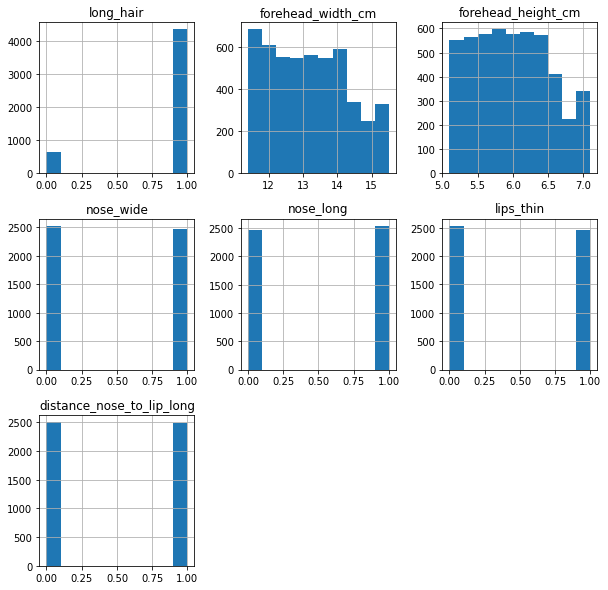

In [10]:
df.hist(figsize=(10,10))

## Replacing Categorical to numbers

In [11]:
df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

In [12]:
df['gender']

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [13]:
df.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


## Handling outliers

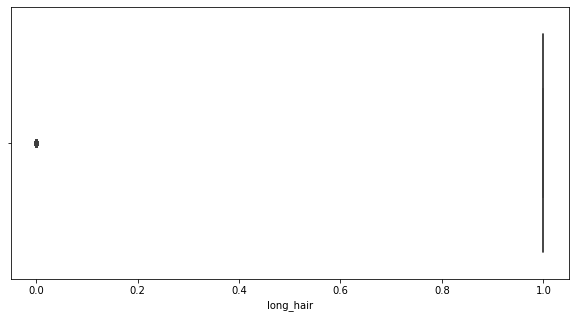

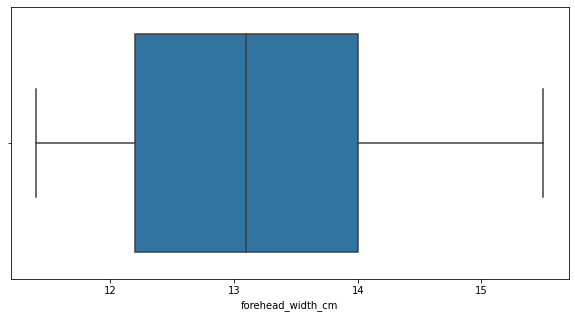

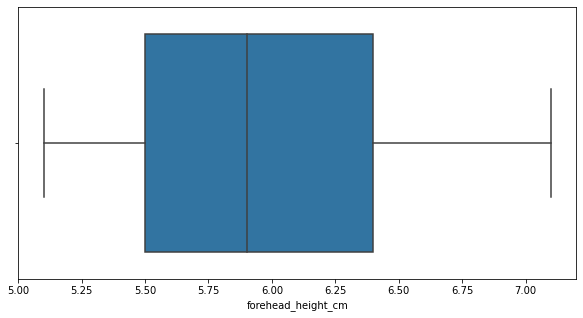

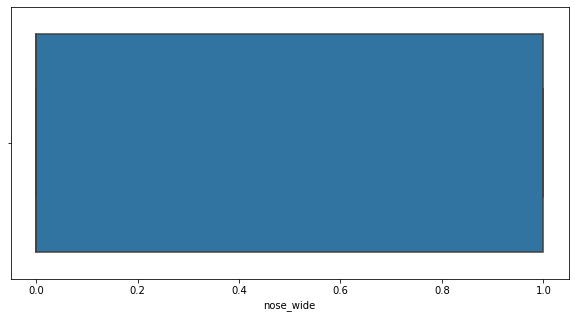

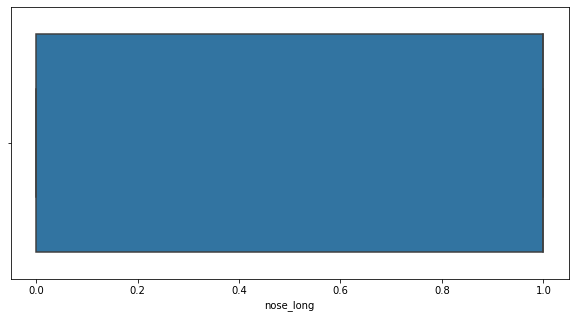

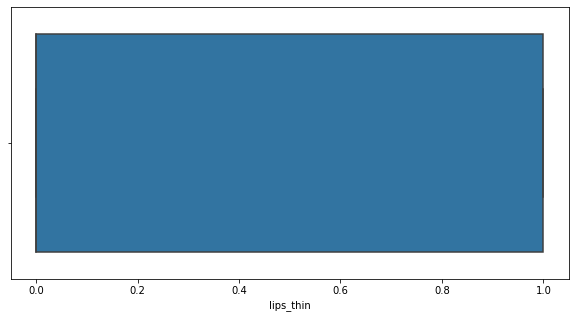

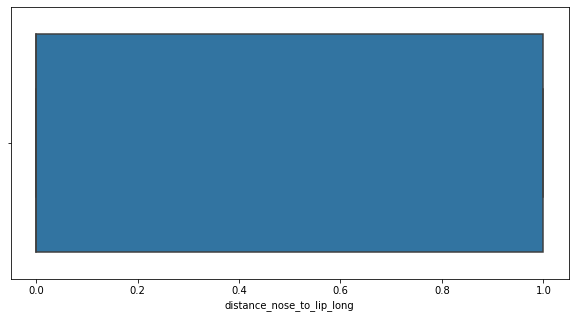

In [14]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [15]:
for column in df.columns[0:-1]: 
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr=q3-q1
    lower_limit = q1-(1.5*iqr)
    upper_limit = q3+(1.5*iqr)
    df[column]=np.where(df[column]<lower_limit,lower_limit,df[column])
    df[column]=np.where(df[column]>upper_limit,upper_limit,df[column])

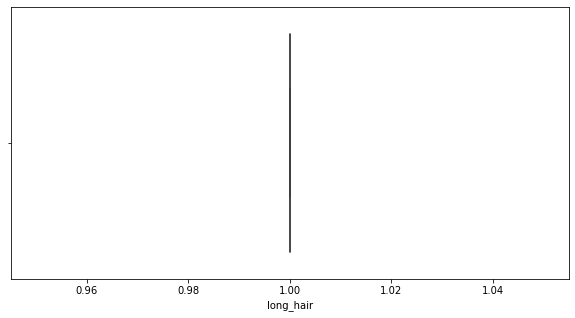

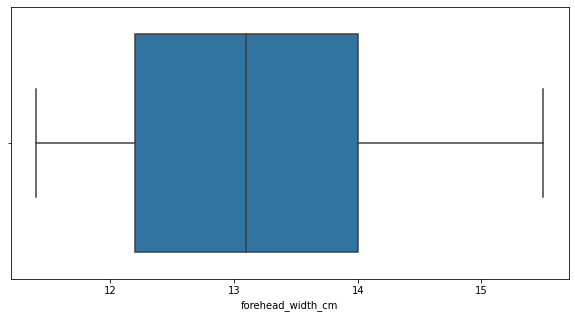

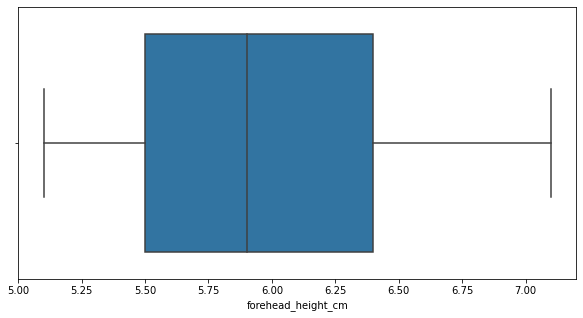

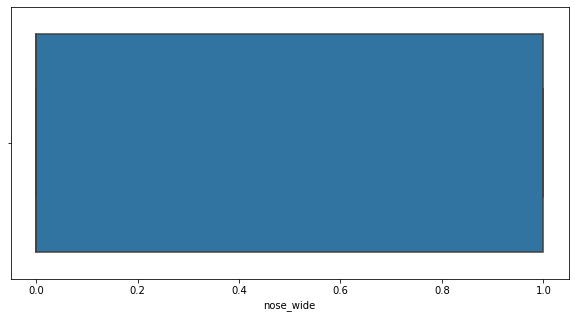

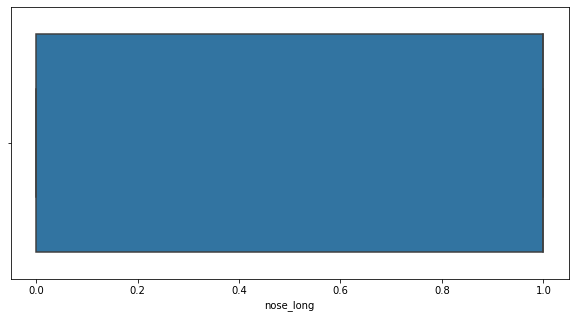

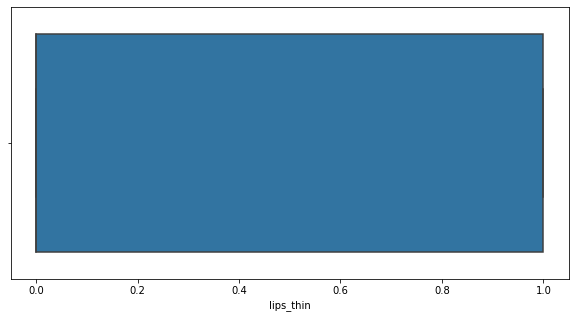

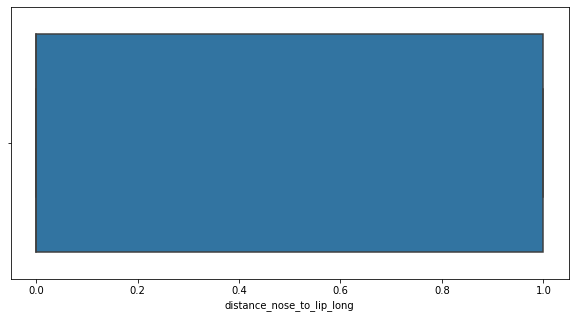

In [16]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

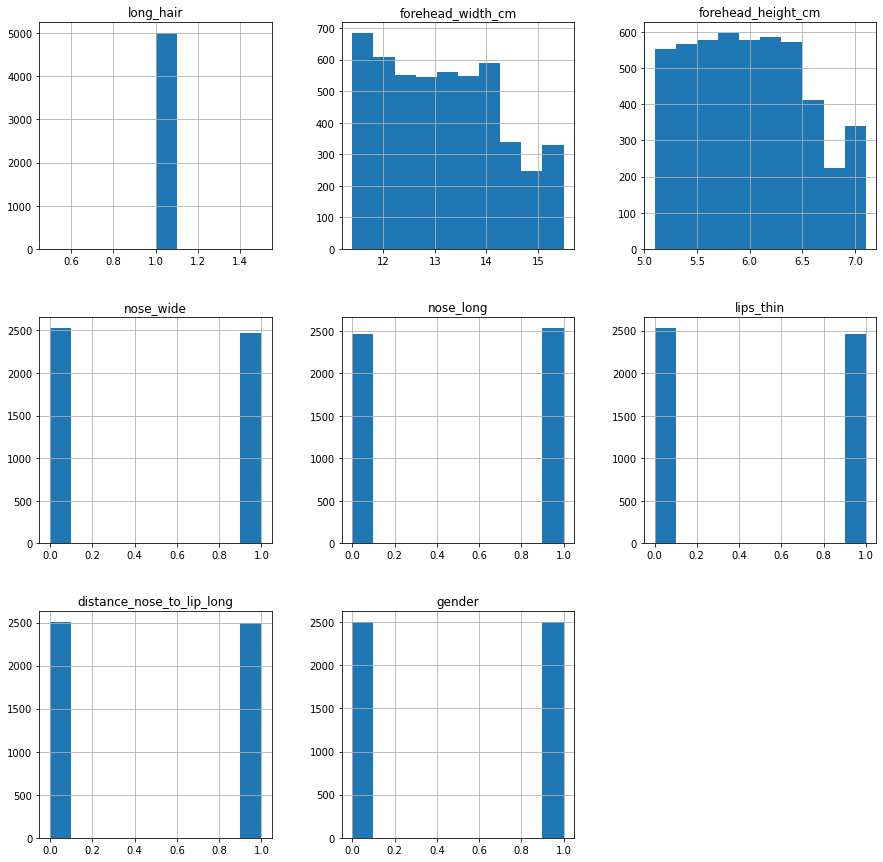

In [17]:
plot = df.hist(figsize=(15,15))

<AxesSubplot:xlabel='gender', ylabel='count'>

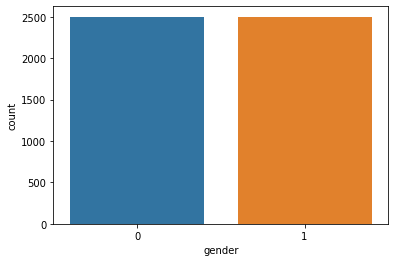

In [18]:
sns.countplot(x='gender',data=df)

Female = 0; Male = 1

## Feature Selection

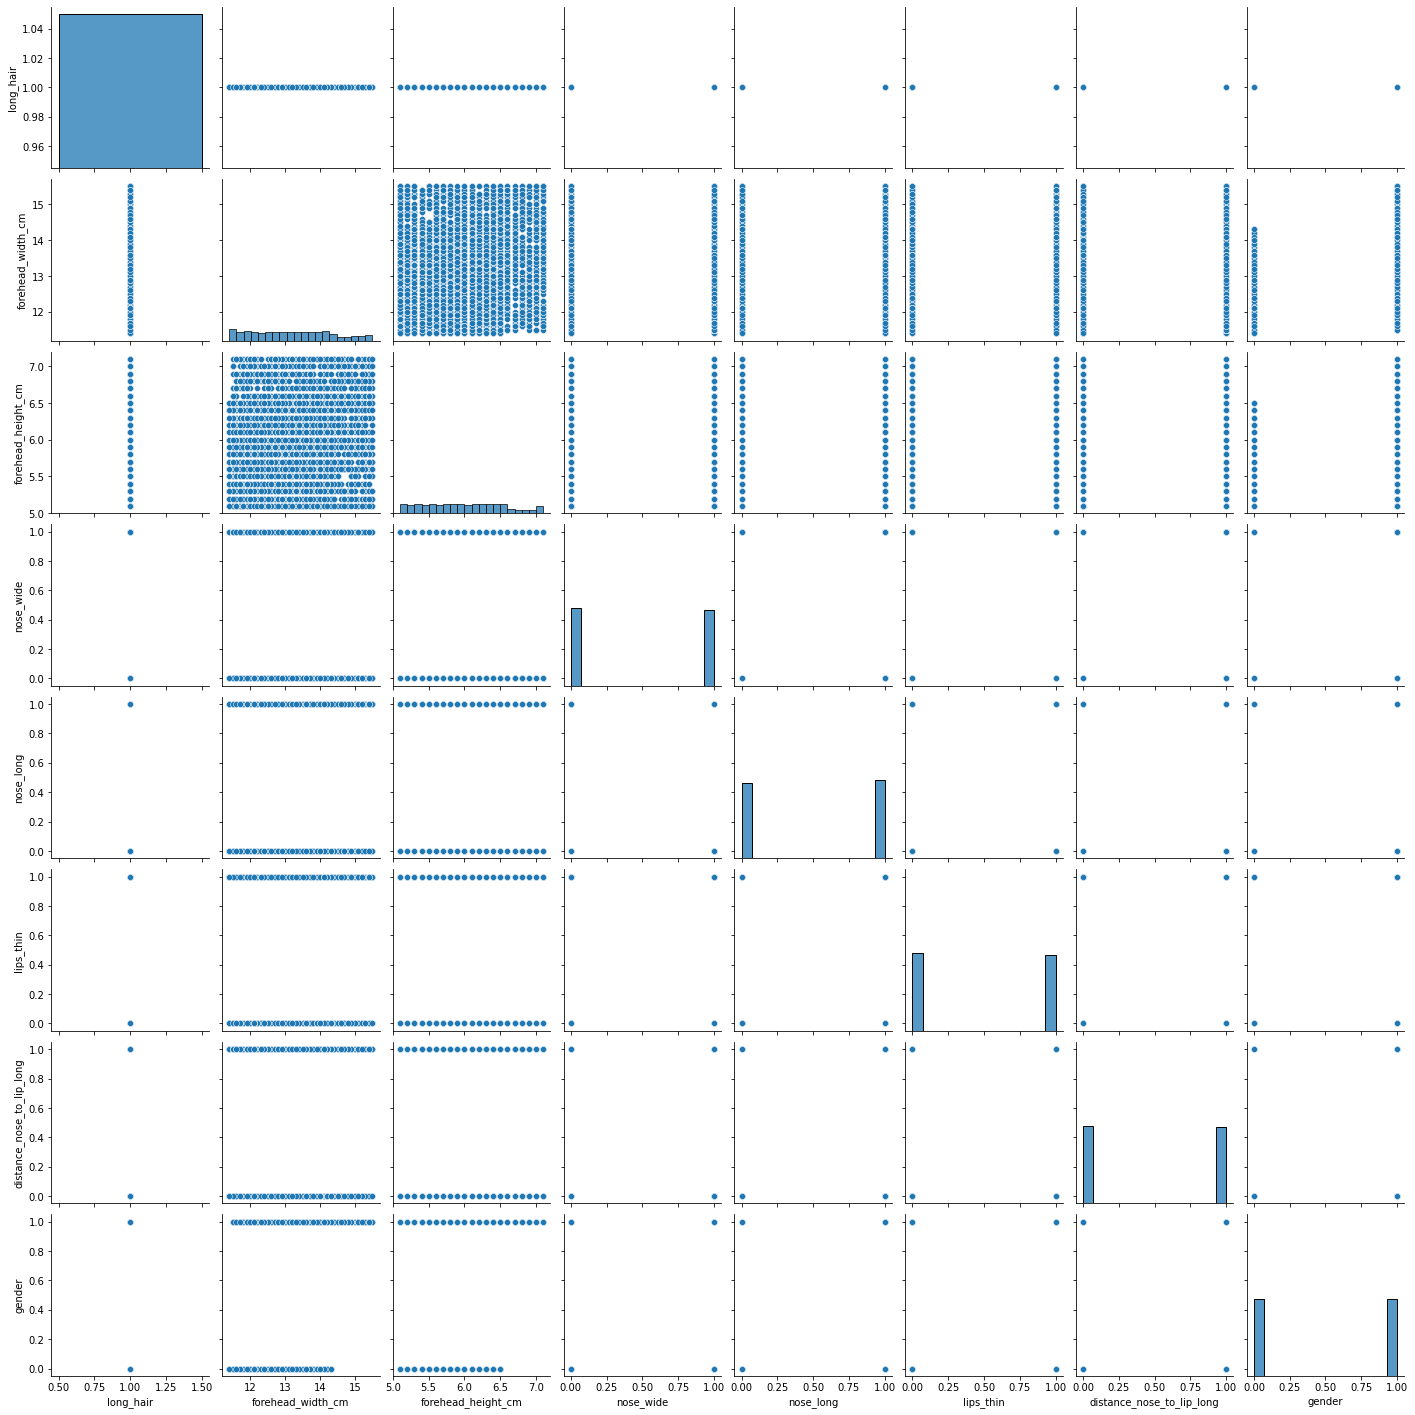

In [19]:
sns.pairplot(data=df)

## Train Test Split 

In [20]:
y = df['gender']
X = df.drop(['gender'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [22]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4000, 7)
y_train shape:  (4000,)
X_test shape:  (1001, 7)
y_test shape:  (1001,)


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.0,1.996850,1.202253,-0.988071,0.987083,1.018674,0.996506
1,0.0,-0.884867,-1.383833,-0.988071,-1.013086,-0.981668,-1.003506
2,0.0,-1.515243,-0.275510,-0.988071,-1.013086,-0.981668,-1.003506
3,0.0,-0.434599,-1.568553,-0.988071,-1.013086,-0.981668,-1.003506
4,0.0,1.726689,-0.644951,1.012073,0.987083,1.018674,0.996506
...,...,...,...,...,...,...,...
3995,0.0,-0.164438,1.017532,-0.988071,-1.013086,-0.981668,-1.003506
3996,0.0,-0.074384,-0.829672,-0.988071,-1.013086,-0.981668,-1.003506
3997,0.0,-1.064975,-0.090790,-0.988071,-1.013086,-0.981668,-1.003506
3998,0.0,-0.344545,-1.014392,-0.988071,-1.013086,-0.981668,-1.003506


In [24]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test_scaled

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.0,0.015669,-0.460231,1.012073,0.987083,1.018674,0.996506
1,0.0,0.465938,0.093930,-0.988071,-1.013086,-0.981668,-1.003506
2,0.0,-0.254492,-1.199112,-0.988071,-1.013086,-0.981668,0.996506
3,0.0,0.015669,-0.090790,1.012073,0.987083,1.018674,0.996506
4,0.0,1.816742,-0.644951,1.012073,0.987083,1.018674,0.996506
...,...,...,...,...,...,...,...
996,0.0,0.285830,-0.275510,-0.988071,-1.013086,-0.981668,-1.003506
997,0.0,-0.524653,-0.829672,1.012073,0.987083,1.018674,0.996506
998,0.0,1.006260,-0.460231,-0.988071,-1.013086,-0.981668,-1.003506
999,0.0,0.646045,0.648092,1.012073,0.987083,1.018674,0.996506


## Model Building and Evaluation

In [25]:
from sklearn.linear_model import LogisticRegression

model_1= LogisticRegression()
model_1.fit(X_train_scaled,y_train)
print("Training accuracy :", model_1.score(X_train_scaled,y_train))

Training accuracy : 0.969


In [26]:
y_pred = model_1.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       502
           1       0.97      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



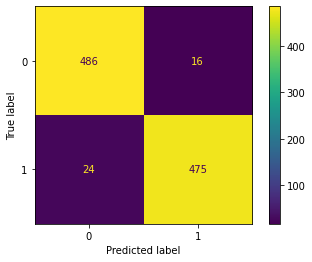

In [27]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(plot_confusion_matrix(model_1,X_test_scaled,y_test))
print(classification_report(y_test,y_pred))

In [28]:
from sklearn.svm import SVC

model_2 = SVC()
model_2.fit(X_train_scaled,y_train)
print("Training accuracy :",model_2.score(X_train_scaled,y_train))

Training accuracy : 0.97775


In [29]:
y_predict = model_2.predict(X_test_scaled)
y_predict

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       502
           1       0.98      0.95      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



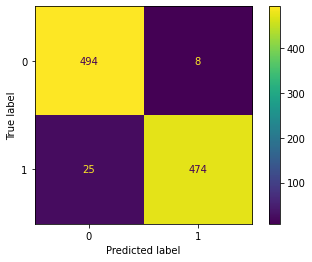

In [30]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(plot_confusion_matrix(model_2,X_test_scaled,y_test))
print(classification_report(y_test,y_predict))

In [31]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier()
model_3.fit(X_train_scaled,y_train)
print("Training accuracy :",model_3.score(X_train_scaled,y_train))

Training accuracy : 0.998


In [32]:
y_predic = model_3.predict(X_test_scaled)
y_predic

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       502
           1       0.96      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



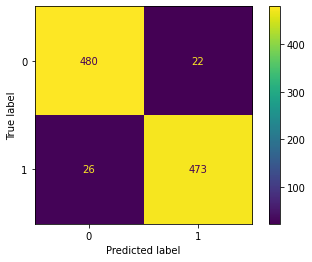

In [33]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(plot_confusion_matrix(model_3,X_test_scaled,y_test))
print(classification_report(y_test,y_predic))

In [34]:
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier()
model_4.fit(X_train_scaled,y_train)
print("Training accuracy :",model_4.score(X_train_scaled,y_train))

Training accuracy : 0.998


In [35]:
y_prediction = model_4.predict(X_test_scaled)
y_prediction

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       502
           1       0.97      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



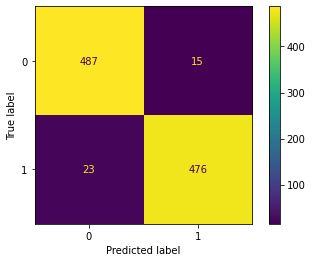

In [36]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(plot_confusion_matrix(model_4,X_test_scaled,y_test))
print(classification_report(y_test,y_prediction))